In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path='/content/gdrive/"My Drive"/"Colab Notebooks"/"data1"'
%ls{path}

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.applications import VGG16

In [ ]:
import os
import cv2
x_train=[]
y_train=[]
x_test=[]
y_test=[]
imagepaths1 = []
imagepaths2 = []
for i in range(4):
  image1path=f"/content/gdrive/MyDrive/Colab Notebooks/data1/train/{i}/"
  image2path=f"/content/gdrive/MyDrive/Colab Notebooks/data1/test/{i}/"
  file1=os.listdir(image1path)
  for f in file1:
    final1=image1path+f
    img = cv2.imread(final1) # Reads image and returns np.array
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
    img = cv2.resize(img, (200, 200))
    x_train.append(img)
    y_train.append(i)

  file2=os.listdir(image2path)
  for f in file2:
    final2=image2path+f
    img = cv2.imread(final2) # Reads image and returns np.array
    #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
    img = cv2.resize(img, (200, 200))
    x_test.append(img)
    y_test.append(i)

In [ ]:
tensorflow.test.gpu_device_name()

**VGG MODEL**


In [ ]:
vgg_conv = VGG16(include_top=False,weights="imagenet",input_shape=(200,200,3))
for layer in vgg_conv.layers[:]:
  layer.trainable=False
for layer in vgg_conv.layers:
  print(layer,layer.trainable)

58900480/58889256 [==============================] - 2s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7efe734c3750> False
<keras.layers.convolutional.Conv2D object at 0x7efe734ddc10> False
<keras.layers.convolutional.Conv2D object at 0x7efe734dd610> False
<keras.layers.pooling.MaxPooling2D object at 0x7efe6a16b990> False
<keras.layers.convolutional.Conv2D object at 0x7efe6a009410> False
<keras.layers.convolutional.Conv2D object at 0x7efe69fa8510> False
<keras.layers.pooling.MaxPooling2D object at 0x7efe69fb2690> False
<keras.layers.convolutional.Conv2D object at 0x7efe69fba9d0> False
<keras.layers.convolutional.Conv2D object at 0x7efe69fb3f50> False
<keras.layers.convolutional.Conv2D object at 0x7efe69facbd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7efe69fc9dd0> False
<keras.layers.convolutional.Conv2D object at 0x7efe69fc6fd0> False
<keras.layers.convolutional.Conv2D object at 0x7efe69fac410> False
<keras.layers.convolutional.Conv2D object at 0x7efe69fd42d0> F

In [ ]:
model2=Sequential()
model2.add(vgg_conv)
model2.add(Flatten())
model2.add(Dense(4,activation='softmax'))
model2.summary()
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
x_train = np.array(x_train, dtype="uint8")
y_train = np.array(y_train)
x_test = np.array(x_test, dtype="uint8")
y_test = np.array(y_test)
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=4)
History2=model2.fit(x_train,y_train, epochs=20, batch_size=200, verbose=2,validation_data=(x_test,y_test)) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 4)                 73732     
                                                                 
Total params: 14,788,420
Trainable params: 73,732
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
73/73 - 213s - loss: 0.6680 - accuracy: 0.9470 - val_loss: 0.4317 - val_accuracy: 0.9685 - 213s/epoch - 3s/step
Epoch 2/20
73/73 - 166s - loss: 0.0411 - accuracy: 0.9945 - val_loss: 0.3843 - val_accuracy: 0.9717 - 166s/epoch - 2s/step
Epoch 3/20
73/73 - 166s - loss: 0.0192 - accuracy: 0.9970

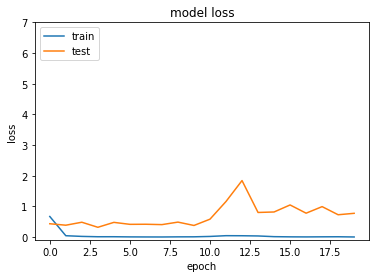

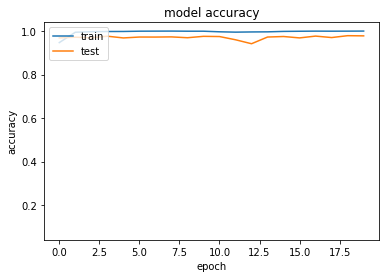

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.plot(History2.history['loss'])
plt.plot(History2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(None,7)
plt.show()

plt.plot(History2.history['accuracy'])
plt.plot(History2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0.04,1.04)
plt.show()

predictions = model2.predict(x_test) # Make predictions towards the test set
y_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number
y_test = np.argmax(y_test, axis=1)

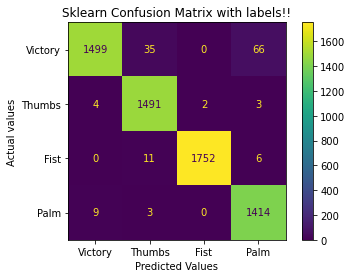

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Victory', 'Thumbs', 'Fist','Palm'])
cmd_obj.plot(values_format='d')
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Values', 
                ylabel='Actual values')
plt.show()

In [ ]:
model2_json = model2.to_json()
with open("VGGMODELNEW.json", "w") as json_file:
    json_file.write(model2_json)
model2.save_weights('VGGMODELNEW.h5')

In [ ]:
m1=[]
tryyy = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/data1/test/0/0.jpg') # Reads image and returns np.array
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
tryyy = cv2.resize(img, (200, 200))
m1.append(tryyy)
m1=np.array(m1)
predictions = model2.predict(m1) 

In [ ]:
import operator
prediction = {'Victory': predictions[0][0], 
                  'Thumb': predictions[0][1], 
                  'Fist': predictions[0][2],
                  'Palm': predictions[0][3],}
    # Sorting based on top prediction
prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)